In [22]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('TLRY',
                   start = start_date,
                   end = end_date,
                   progress = False)

data['Date'] = data.index
date = data[['Date',
             'Open',
             'High',
             'Low',
             'Close',
             'Adj Close',
             'Volume']]
data.reset_index(drop = True, inplace = True)
print(data.tail())

     Open  High   Low  Close  Adj Close    Volume       Date
246  1.89  1.89  1.82   1.83       1.83  14489100 2024-05-23
247  1.84  1.88  1.83   1.85       1.85  10145700 2024-05-24
248  1.85  1.86  1.80   1.82       1.82  13005400 2024-05-28
249  1.80  1.82  1.78   1.81       1.81  10868600 2024-05-29
250  1.82  1.88  1.79   1.80       1.80  17522600 2024-05-30


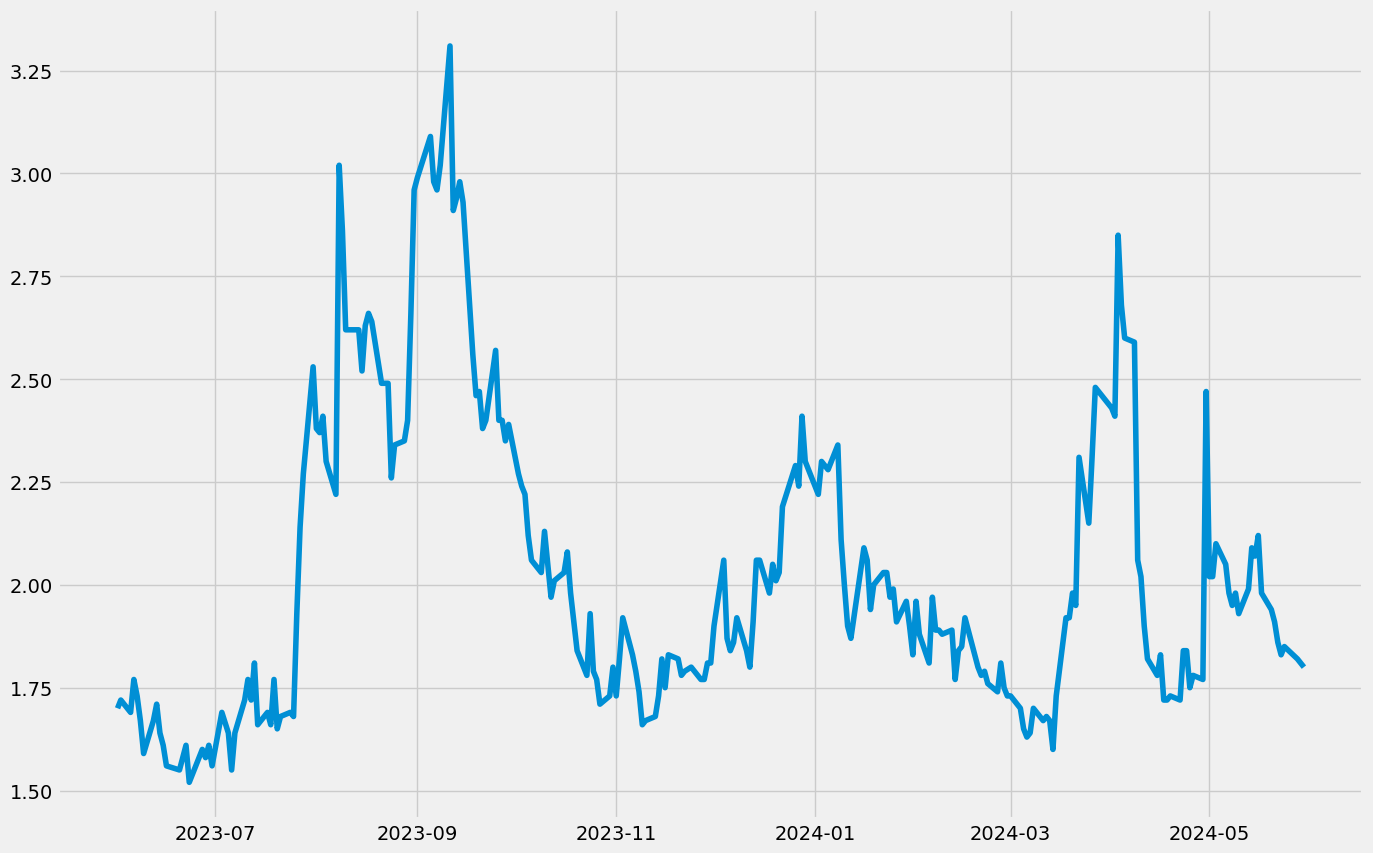

In [23]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 10))
plt.plot(data['Date'], data['Close'])

<Figure size 640x480 with 0 Axes>

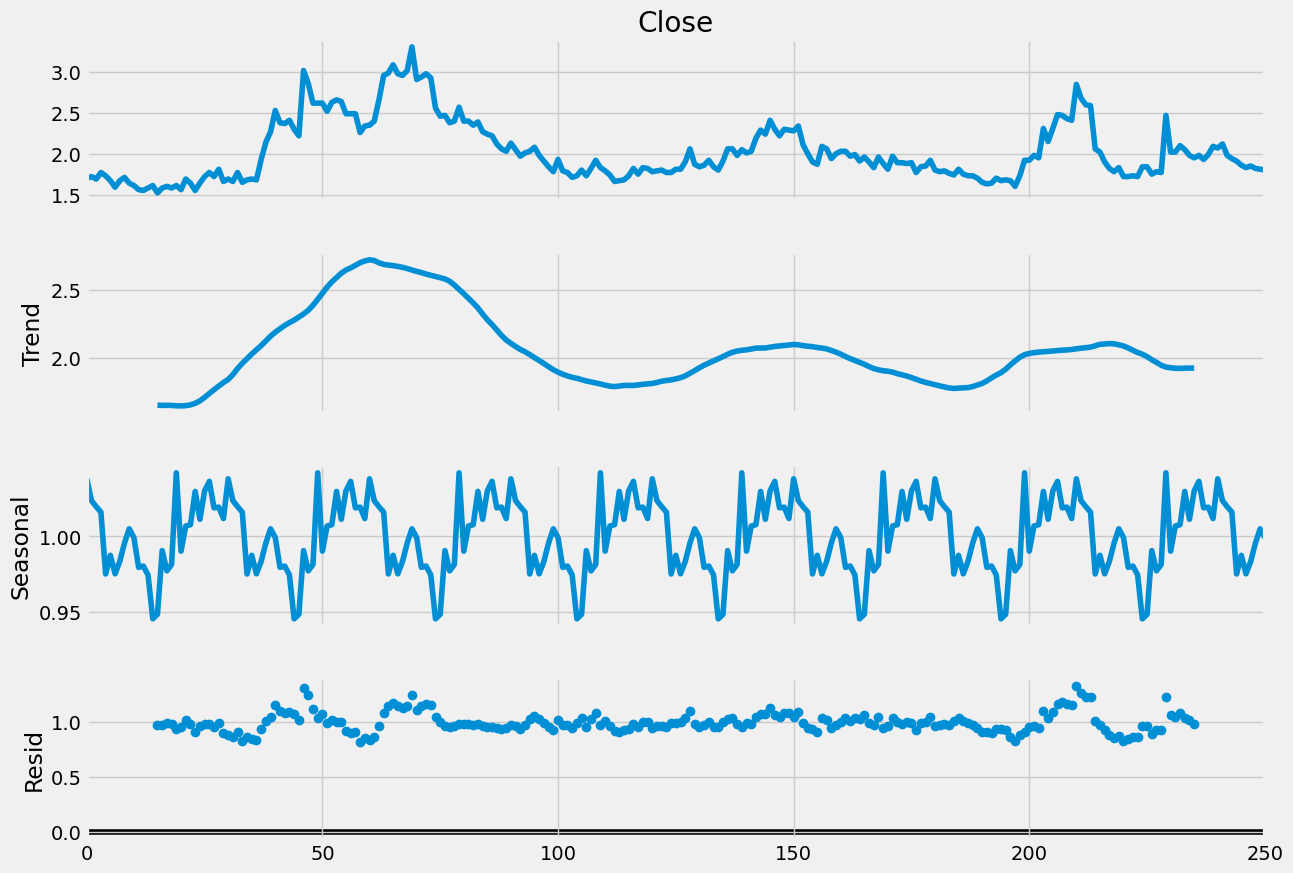

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', 
                            period = 30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

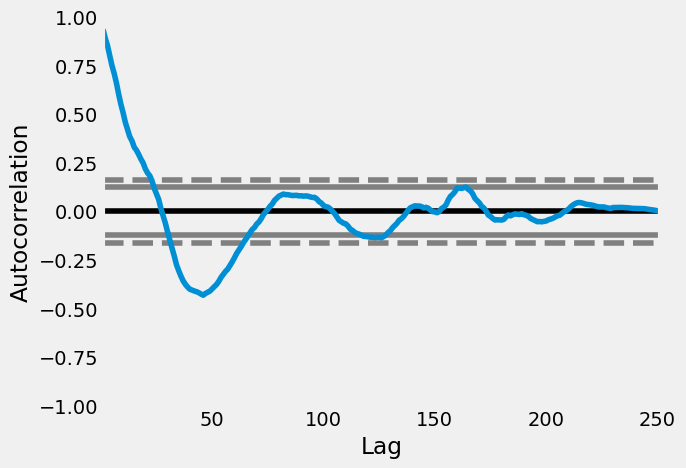

In [25]:
pd.plotting.autocorrelation_plot(data['Close'])

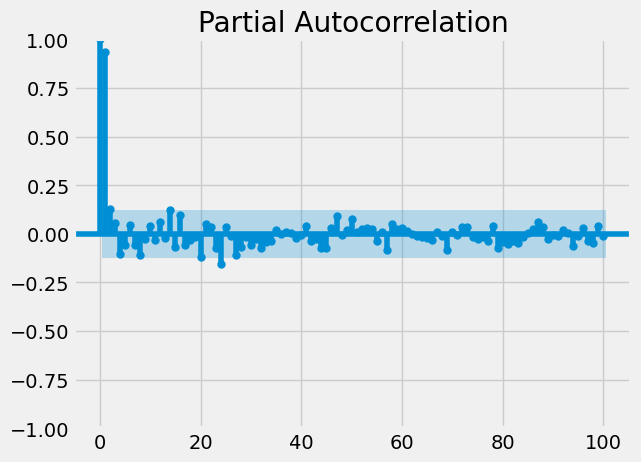

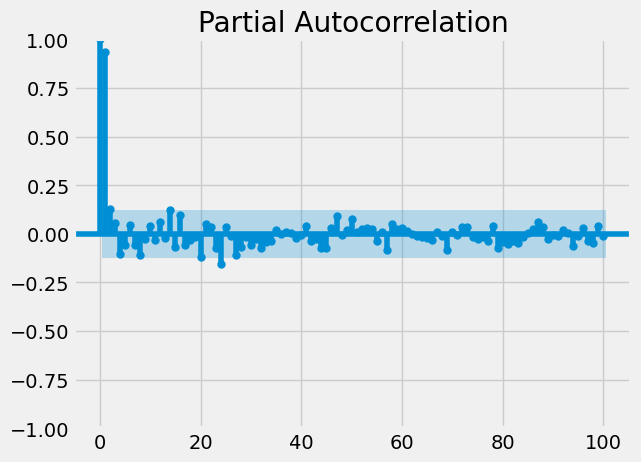

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Close'],
         lags = 100)

In [27]:
p, d, q = 5, 1, 2

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], 
              order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 164.473
Date:                Fri, 31 May 2024   AIC                           -312.946
Time:                        10:34:40   BIC                           -284.775
Sample:                             0   HQIC                          -301.608
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0974      0.109     -0.897      0.370      -0.310       0.115
ar.L2          0.8379      0.101      8.295      0.000       0.640       1.036
ar.L3          0.2366      0.095      2.489      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
predictions = fitted.predict()
print(predictions)

0      0.000000
1      1.700000
2      1.716832
3      1.693480
4      1.760651
         ...   
246    1.850788
247    1.857012
248    1.834240
249    1.841120
250    1.811008
Name: predicted_mean, Length: 251, dtype: float64


In [29]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                 136.181
Date:                            Fri, 31 May 2024   AIC                           -242.362
Time:                                    10:35:29   BIC                           -190.278
Sample:                                         0   HQIC                          -221.371
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3830      0.718     -0.533      0.594      -1.791       1.025
ar.L2         -0.5992      0.754   

In [36]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

251    1.813671
252    1.813319
253    1.847896
254    1.792935
255    1.801708
256    1.822920
257    1.804391
258    1.796465
259    1.829732
260    1.804132
261    1.806041
262    1.794045
263    1.845436
264    1.832944
265    1.872703
266    1.846759
267    1.855501
268    1.872862
269    1.854311
270    1.894319
271    1.907275
272    1.872336
273    1.873569
274    1.807821
275    1.848035
276    1.824733
277    1.839737
278    1.820717
279    1.834611
280    1.838021
281    1.822076
Name: predicted_mean, dtype: float64


<Axes: >

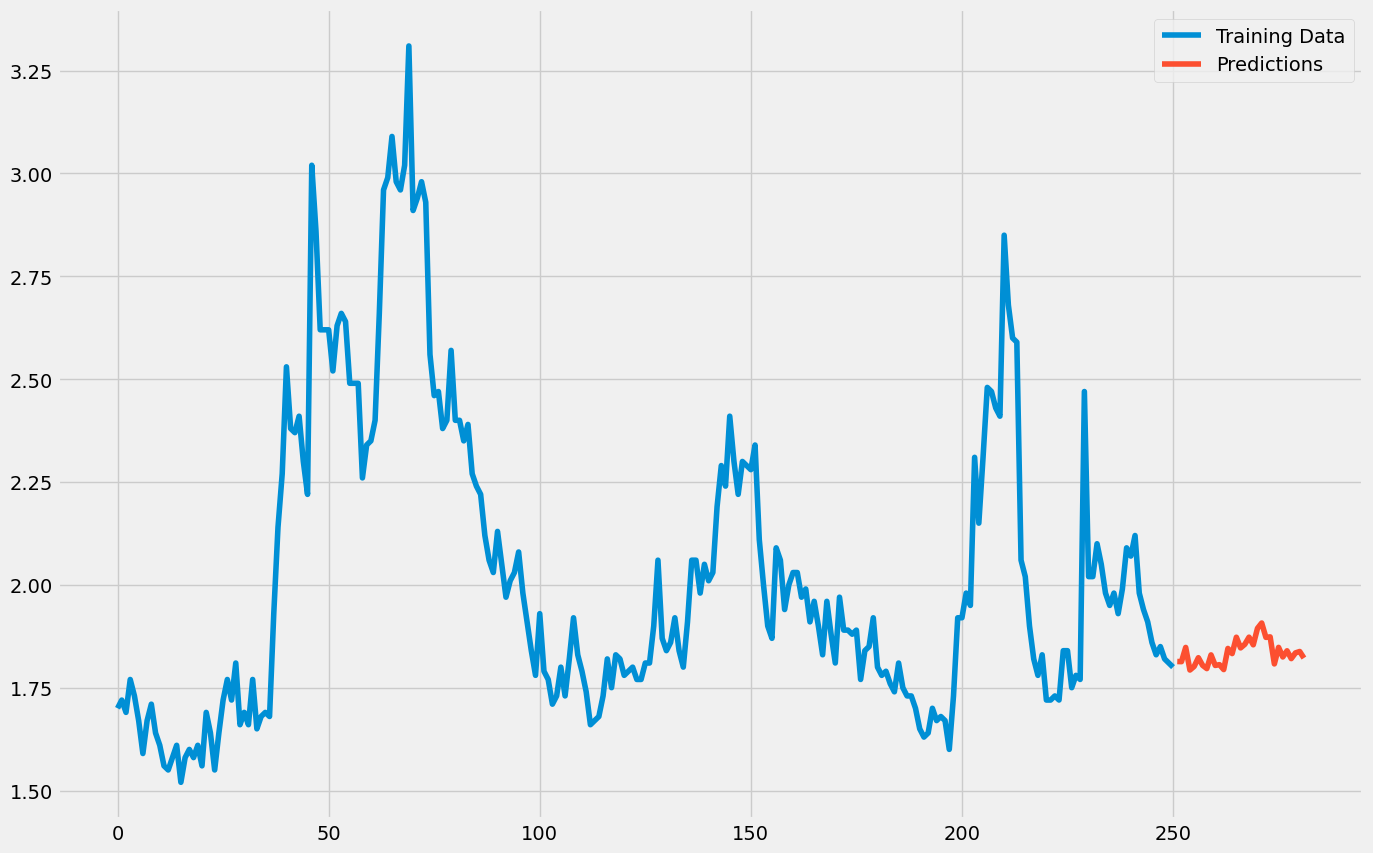

In [37]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")